<b>Python version:</b>  >3.6<br/>
<b>External Packages:</b> pandas, matplotlib, sklearn, numpy<br/>
<b>Last update:</b> 31st Jan 2018

<b>About this project:</b> This is an academic project, submitted as a part of semester credits in "Machine Learning by <a href="http://pages.di.unipi.it/micheli/">Prof. Micheli </a>" at Università di Pisa. 
</span>

<a id='top'></a>
# *Demonstration of Perceptron Model*

In this notebook, the perceptron model is demonstrated and tested. The model is functional perceptron model is developed from the scratch. The aim was to implement our understanidng of perceptron model and to test the effect of various hyper-parameters. It is a very flexible model with support of classification as well as regression tasks. This model supports hyper parameters such as learning rate, momentum, regularization, weight initialization types etc. Almost every parameter can be passed through grid search and can be tuned. <br>
<br>
Grid search with cross validation is also developed in addition, to try different combinations of hyperparameters in order to do classification/regression tasks. Grid search returns the log(if log=True) and the list of best hyperparameters (length depends upon 'topn' function parameter). The hyper parameters are chosen according to either least trainingLoss or least validationLoss or the mean of two. 


## Table of Contents

1. [Experiments on Monk 1 dataset](#monk1)
    1. [Grid Search on Monk 1](#monk1gs)
    2. [Training Monk1 with best parameters obtained](#monk1train)
    3. [Testing Monk1](#monk1test)
    4. [Training monk1 with best parameters obtained, with cross validation](#monk1cv)
2. [Experiments on Monk 2 dataset](#monk2)
    1. [Grid Search on Monk 2](#monk2gs)
    2. [Training Monk 2 with best parameters obtained](#monk2train)
    3. [Testing Monk 2](#monk2test)
    4. [Training monk 3 with best parameters obtained, with cross validation](#monk2cv)
3. [Experiments on Monk 3 dataset](#monk3)
    1. [Grid Search on Monk 3](#monk3gs)
    2. [Training Monk 3 with best parameters obtained](#monk3train)
    3. [Testing Monk 3](#monk3test)
    4. [Training monk 3 with best parameters obtained, with cross validation](#monk3cv)
        
4. [Regression Problem | ML Cup](#mlcup)
    1. [Grid search on regression problem](#mlcupgs)
    2. [Training with with best parameters obtained](#mlcuptrain)
    3. [Training with cross validation, with best parameters](#mlcupcv)
    4. [Blind Test](#blindtest)

In [1]:
import pdb, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import sklearn.preprocessing as preprocessing
from itertools import product

In [2]:
from source.perceptron import perceptron
from source.abGridSearchCV import abGridSearchCV
from source.loadData import loadMonk

<a id='monk1'></a>
# 0. Monk Datasets ([to top](#top))

Attributes with granularity:
a1: 1, 2, 3
a2: 1, 2, 3
a3: 1, 2
a4: 1, 2, 3
a5: 1, 2, 3, 4
a6: 1, 2
target: 0, 1

#### In Monk 1 Dataset, the targets are 1 if (a1==a2) or (a5==1)

#### In Monk 2 Dataset, the targets are 1 if exactly two of {a1 = 1, a2 = 1, a3 = 1, a4 = 1, a5 = 1, a6 = 1} are correct. 

#### In Monk 3 Dataset, targets are 1 if (a5 = 3 and a4 = 1) or (a5 /= 4 and a2 /= 3).

```
Carnegie Mellon University Pittsburgh, PA 15213, USA E-mail: thrun '@' cs.cmu. edu.
```

<a id='monk1'></a>
# 1. Experiments on Monk 1 ([to top](#top))

In [3]:
trainData, trainLabels=loadMonk(1, 'train', encodeLabel=False)

<a id='monk1gs'></a>
### A. Grid Search on Monk1 ([to top](#top))

ETA is learning rate,
LAMBDA is regularization parameter,
ALPHA is momentum,

In [4]:
defaultParameters={
    'hiddenUnits':3,
    'randomSeed':0,
    'activation':'sigm',
    'epochs':200,
    'ETA':0.4,
    'LAMBDA':0.0,
    'loss':"MEE",
    'ALPHA':0.9,
    'weightInitialization':'xav',
    'regression':False
}

parameterGridForModelSelection={
#     'randomSeed':[0, 20],
    'hiddenUnits':[4, 16],
    'activation':['sigm', 'relu', 'tanh'],
    'ETA':[0.1, 0.2, 0.3, 0.5, 0.7,0.9],
    'LAMBDA':[0.001,0.01],
    'ALPHA':[0.2, 0.5, 0.7, 0.9],
#     'weightInitialization':['xav', 'type1', 'type2'],
    'epochs':[300, 500]
}

In [5]:
top5BestParams=abGridSearchCV(defaultParameters, parameterGridForModelSelection, trainData, trainLabels, winnerCriteria="meanLosses", validationSplit=0.3, log=False, topn=5)

In [6]:
top5BestParams

[{'meanLosses': 0.053398468491707193,
  'meanTrainingLoss': 0.045918603297790385,
  'meanValidationLoss': 0.060878333685624002,
  'params': {'ALPHA': 0.9,
   'ETA': 0.7,
   'LAMBDA': 0.001,
   'activation': 'sigm',
   'epochs': 500,
   'hiddenUnits': 4}},
 {'meanLosses': 0.056483538526203809,
  'meanTrainingLoss': 0.048952574490511325,
  'meanValidationLoss': 0.064014502561896294,
  'params': {'ALPHA': 0.7,
   'ETA': 0.9,
   'LAMBDA': 0.001,
   'activation': 'sigm',
   'epochs': 500,
   'hiddenUnits': 4}},
 {'meanLosses': 0.058464538603792783,
  'meanTrainingLoss': 0.050140872761654159,
  'meanValidationLoss': 0.066788204445931407,
  'params': {'ALPHA': 0.7,
   'ETA': 0.7,
   'LAMBDA': 0.001,
   'activation': 'sigm',
   'epochs': 500,
   'hiddenUnits': 4}},
 {'meanLosses': 0.060699319101547106,
  'meanTrainingLoss': 0.055375540019551382,
  'meanValidationLoss': 0.066023098183542822,
  'params': {'ALPHA': 0.9,
   'ETA': 0.9,
   'LAMBDA': 0.001,
   'activation': 'sigm',
   'epochs': 500,

In [7]:
bestParams=top5BestParams[0]['params']

In [8]:
bestParams

{'ALPHA': 0.9,
 'ETA': 0.7,
 'LAMBDA': 0.001,
 'activation': 'sigm',
 'epochs': 500,
 'hiddenUnits': 4}

<a id='monk1train'></a>
### B. Training Monk 1 with best parameters obtained ([to top](#top))

<h5> For fun.. testing a neural network initialized with zero weights

In [9]:
x=perceptron(**defaultParameters)
x.set_params(**bestParams)
x.set_params(weightInitialization='zero')
x.fit(trainData, trainLabels)

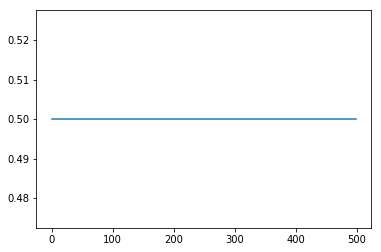

In [10]:
plt.plot(x.losses)

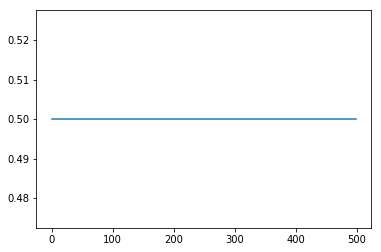

In [11]:
plt.plot(x.accuracies)

In [12]:
testData, testLabels=loadMonk(1, 'test', encodeLabel=False)
testResults, testAccuracy=x.predict(testData, testLabels, acc_=True)

In [13]:
testAccuracy

0.5

<h5> fun's over!!!; now let's train our network with best params

In [14]:
x=perceptron(**defaultParameters)
x.set_params(**bestParams)
x.fit(trainData, trainLabels)

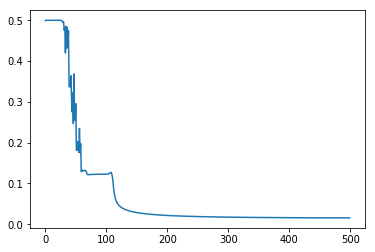

In [15]:
plt.plot(x.losses)

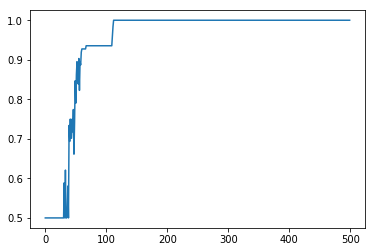

In [16]:
plt.plot(x.accuracies)

<a id='monk1test'></a>
### B. Testing Monk 1 trained model([to top](#top))

In [17]:
testData, testLabels=loadMonk(1, 'test', encodeLabel=False)

In [18]:
testResults, testAccuracy=x.predict(testData, testLabels, acc_=True)

In [19]:
testAccuracy

1.0

<a id='monk1cv'></a>
### C. Training Monk 1 with best parameters obtained, with cross validation ([to top](#top))

In [20]:
trainData, trainLabels=loadMonk(1, 'train', encodeLabel=False)
trainData, validationData, trainLabels, validationLabels=train_test_split(trainData, trainLabels, test_size=0.1)

In [21]:
x=perceptron(**defaultParameters)
x.set_params(**bestParams)
x.fit(trainData, trainLabels, validationFeatures=validationData, validationLabels=validationLabels)

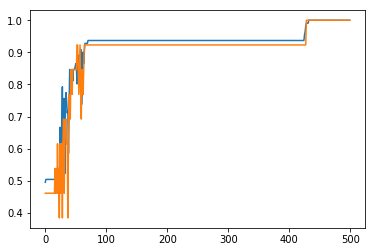

In [22]:
plt.plot(x.accuracies)
plt.plot(x.validationAccuracies)

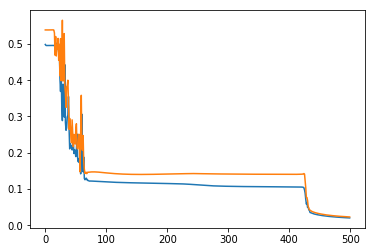

In [23]:
plt.plot(x.losses)
plt.plot(x.validationLosses)

<a id='monk2'></a>
# 2. Monk 2 ([to top](#top))

In [24]:
trainData, trainLabels=loadMonk(2, 'train', encodeLabel=False)

<a id='monk2gs'></a>
### A. Grid Search on Monk 2 ([to top](#top))

In [25]:
top5BestParams=abGridSearchCV(defaultParameters, parameterGridForModelSelection, trainData, trainLabels, winnerCriteria="meanLosses", validationSplit=0.3, log=False, topn=5)

In [26]:
top5BestParams

[{'meanLosses': 0.066685408710796298,
  'meanTrainingLoss': 0.060447339958722986,
  'meanValidationLoss': 0.072923477462869604,
  'params': {'ALPHA': 0.9,
   'ETA': 0.3,
   'LAMBDA': 0.001,
   'activation': 'sigm',
   'epochs': 500,
   'hiddenUnits': 4}},
 {'meanLosses': 0.069998958696422642,
  'meanTrainingLoss': 0.063387071770645911,
  'meanValidationLoss': 0.076610845622199358,
  'params': {'ALPHA': 0.7,
   'ETA': 0.3,
   'LAMBDA': 0.001,
   'activation': 'sigm',
   'epochs': 500,
   'hiddenUnits': 4}},
 {'meanLosses': 0.073795326852853962,
  'meanTrainingLoss': 0.065396272472380612,
  'meanValidationLoss': 0.082194381233327313,
  'params': {'ALPHA': 0.7,
   'ETA': 0.5,
   'LAMBDA': 0.001,
   'activation': 'sigm',
   'epochs': 500,
   'hiddenUnits': 4}},
 {'meanLosses': 0.076765077483135991,
  'meanTrainingLoss': 0.068847619529267629,
  'meanValidationLoss': 0.084682535437004339,
  'params': {'ALPHA': 0.5,
   'ETA': 0.3,
   'LAMBDA': 0.001,
   'activation': 'sigm',
   'epochs': 500,

In [27]:
bestParams=top5BestParams[0]['params']

<a id='monk2train'></a>
### B. Training Monk 2 with the best parameters obtained([to top](#top))

In [28]:
x=perceptron(**defaultParameters)
x.set_params(**bestParams)
x.fit(trainData, trainLabels)

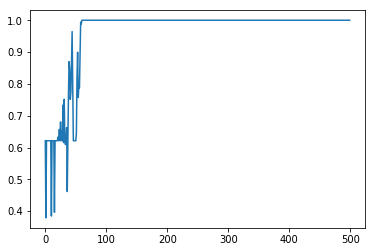

In [29]:
plt.plot(x.accuracies)

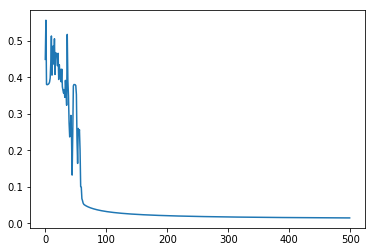

In [30]:
plt.plot(x.losses)

<a id='monk2test'></a>
### C. Testing Monk 2([to top](#top))

In [31]:
# to see if a model trained on Monk2 can classify Monk 1
testData, testLabels=loadMonk(1, 'test', encodeLabel=False)
testResults, testAccuracy=x.predict(testData, testLabels, acc_=True)

In [32]:
testAccuracy #of Monk1 on model trained on monk2

0.43981481481481483

In [33]:
#getting serious now ;D
testData, testLabels=loadMonk(2, 'test', encodeLabel=False)
testResults, testAccuracy=x.predict(testData, testLabels, acc_=True)

In [34]:
testAccuracy #yayy!

1.0

<a id='monk2cv'></a>
### D. Training Monk 2 with the best parameters and with cross validation([to top](#top))

In [35]:
trainData, trainLabels=loadMonk(2, 'train', encodeLabel=False)
trainData, validationData, trainLabels, validationLabels=train_test_split(trainData, trainLabels, test_size=0.1)
x=perceptron(**defaultParameters)
x.set_params(**bestParams)
x.fit(trainData, trainLabels, validationFeatures=validationData, validationLabels=validationLabels)

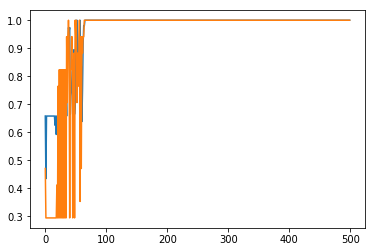

In [36]:
plt.plot(x.accuracies)
plt.plot(x.validationAccuracies)

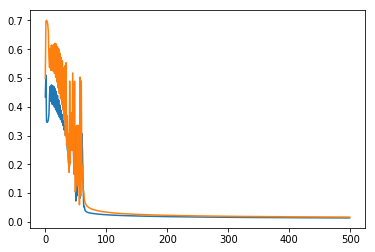

In [37]:
plt.plot(x.losses)
plt.plot(x.validationLosses)

<a id='monk3'></a>
# 3. Monk 3 ([to top](#top))

In [38]:
trainData, trainLabels=loadMonk(3, 'train', encodeLabel=False)

<a id='monk3gs'></a>
### A. Grid Search on Monk 3 ([to top](#top))

In [39]:
top5BestParams=abGridSearchCV(defaultParameters, parameterGridForModelSelection, trainData, trainLabels, winnerCriteria="meanLosses", validationSplit=0.3, log=False, topn=5)

In [40]:
top5BestParams

[{'meanLosses': 0.065228102927357257,
  'meanTrainingLoss': 0.04457685411711515,
  'meanValidationLoss': 0.085879351737599377,
  'params': {'ALPHA': 0.9,
   'ETA': 0.7,
   'LAMBDA': 0.001,
   'activation': 'sigm',
   'epochs': 500,
   'hiddenUnits': 4}},
 {'meanLosses': 0.0659745612385612,
  'meanTrainingLoss': 0.05573462778847995,
  'meanValidationLoss': 0.076214494688642456,
  'params': {'ALPHA': 0.7,
   'ETA': 0.9,
   'LAMBDA': 0.001,
   'activation': 'sigm',
   'epochs': 500,
   'hiddenUnits': 4}},
 {'meanLosses': 0.068240900149349359,
  'meanTrainingLoss': 0.056069152305813358,
  'meanValidationLoss': 0.080412647992885361,
  'params': {'ALPHA': 0.9,
   'ETA': 0.3,
   'LAMBDA': 0.001,
   'activation': 'sigm',
   'epochs': 500,
   'hiddenUnits': 4}},
 {'meanLosses': 0.07078235792723464,
  'meanTrainingLoss': 0.05607186185276021,
  'meanValidationLoss': 0.08549285400170907,
  'params': {'ALPHA': 0.5,
   'ETA': 0.5,
   'LAMBDA': 0.001,
   'activation': 'sigm',
   'epochs': 500,
   'hi

In [41]:
bestParams=top5BestParams[0]['params']

<a id='monk3train'></a>
### B. Training Monk 3 with the best parameters obtained([to top](#top))

In [42]:
x=perceptron(**defaultParameters)
x.set_params(**bestParams)
x.fit(trainData, trainLabels)

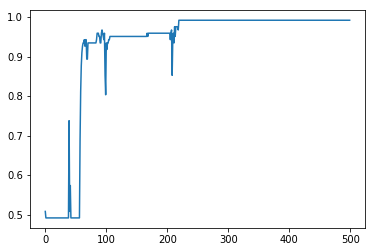

In [43]:
plt.plot(x.accuracies)

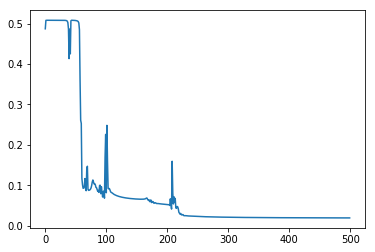

In [44]:
plt.plot(x.losses)

<a id='monk3test'></a>
### C. Testing Monk 3 trained Model([to top](#top))

In [45]:
testData, testLabels=loadMonk(3, 'test', encodeLabel=False)
testResults, testAccuracy=x.predict(testData, testLabels, acc_=True)

In [46]:
testAccuracy

0.9467592592592593

<a id='monk3cv'></a>
### D. Training monk 3 with the best parameters and with cross validation([to top](#top))

In [47]:
trainData, trainLabels=loadMonk(3, 'train', encodeLabel=False)
trainData, validationData, trainLabels, validationLabels=train_test_split(trainData, trainLabels, test_size=0.2)
x=perceptron(**defaultParameters)
x.set_params(**bestParams)
x.fit(trainData, trainLabels, validationFeatures=validationData, validationLabels=validationLabels)

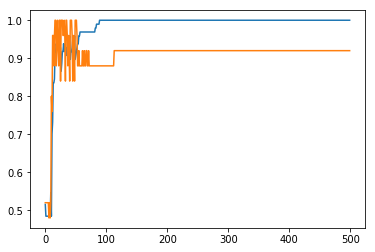

In [48]:
plt.plot(x.accuracies)
plt.plot(x.validationAccuracies)

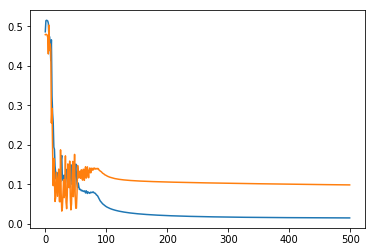

In [49]:
plt.plot(x.losses)
plt.plot(x.validationLosses)

<a id='mlcup'></a>
# 4. Regression Problem | ML Cup([to top](#top))

The dataset (ML Cup) contains 10 features and 2 labels. Both features and lables are continuous values. 
The dataset contains 1015 rows for training. The blind test data contains 315 unlabled rows with 10 columns. 
```
Dataset provided by Prof. Alessio Micheli, Università di Pisa.
```

<h4>Data preparation

In [3]:
cupTrain=pd.read_csv('data/mlCup/ML-CUP18-TR.csv', skiprows=9, usecols=range(1,13))
colums=["i{}".format(i) for i in range(1,11)]+['classX', 'classY']
cupTrain.columns=colums
len(cupTrain)

1015

In [11]:
features=cupTrain.drop(['classX','classY'],axis = 1).values
labels=cupTrain[['classX', 'classY']].values

In [4]:
cupTest=pd.read_csv('data/mlCup/ML-CUP18-TS.csv', header=None)
colums=['index']+["i{}".format(i) for i in range(1,11)]
cupTest.columns=colums
len(cupTest)

315

In [6]:
cupTest=cupTest.drop(['index'], axis=1)

In [12]:
blindFeatures=cupTest.values

In [13]:
trainDataCup, validationDataCup, trainLabelsCup, validationLabelsCup=train_test_split(features,labels, test_size=0.2, shuffle=True)

In [14]:
minMaxScaler = preprocessing.MinMaxScaler()
stdScaler=preprocessing.StandardScaler()

<h5>scaling

In [15]:
trainData=stdScaler.fit_transform(features)
trainLabels=stdScaler.fit_transform(labels)
trainDataCup =stdScaler.fit_transform(trainDataCup)
validationDataCup=stdScaler.fit_transform(validationDataCup)
blindFeatures=stdScaler.fit_transform(blindFeatures)

<a id='mlcupgs'></a>
### A. Grid Search on regression problem ([to top](#top))

In [16]:
defaultParameters={
    'hiddenUnits':3,
    'randomSeed':0,
    'activation':'sigm',
    'epochs':200,
    'ETA':0.4,
    'LAMBDA':0.0,
    'loss':"MEE",
    'ALPHA':0.9,
    'weightInitialization':'xav',
    'regression':True
}

parameterGridForModelSelection={
#     'randomSeed':[0, 20],
    'hiddenUnits':[4, 16, 50],
    'activation':['sigm', 'relu', 'tanh'],
    'ETA':[0.1, 0.2, 0.4, 0.5,0.7, 0.9],
    'LAMBDA':[0.1,0.01, 0.001],
    'ALPHA':[0.4, 0.1, 0.7],
    'weightInitialization':['xav', 'type1', 'type2'],
    'epochs':[200, 400, 800]
}

In [60]:
top5BestParams=abGridSearchCV(defaultParameters, parameterGridForModelSelection, trainData, trainLabels, winnerCriteria="meanLosses", validationSplit=0.3, log=False, topn=5)

In [61]:
top5BestParams

[{'meanLosses': 0.14687525283909958,
  'meanTrainingLoss': 0.14464470505989305,
  'meanValidationLoss': 0.14910580061830608,
  'params': {'ALPHA': 0.7,
   'ETA': 0.1,
   'LAMBDA': 0.001,
   'activation': 'relu',
   'epochs': 800,
   'hiddenUnits': 50,
   'weightInitialization': 'xav'}},
 {'meanLosses': 0.14734677466170659,
  'meanTrainingLoss': 0.14445388968860054,
  'meanValidationLoss': 0.15023965963481264,
  'params': {'ALPHA': 0.7,
   'ETA': 0.1,
   'LAMBDA': 0.001,
   'activation': 'tanh',
   'epochs': 800,
   'hiddenUnits': 4,
   'weightInitialization': 'xav'}},
 {'meanLosses': 0.14826573334378448,
  'meanTrainingLoss': 0.14503399595048538,
  'meanValidationLoss': 0.15149747073708358,
  'params': {'ALPHA': 0.7,
   'ETA': 0.1,
   'LAMBDA': 0.01,
   'activation': 'relu',
   'epochs': 800,
   'hiddenUnits': 50,
   'weightInitialization': 'xav'}},
 {'meanLosses': 0.14875443947407324,
  'meanTrainingLoss': 0.14382665662926375,
  'meanValidationLoss': 0.15368222231888271,
  'params': {

In [18]:
bestParams=top5BestParams[0]['params']
bestParams

<a id='mlcuptrain'></a>
### B. Training with best parameters obtained ([to top](#top))

In [19]:
x=perceptron(**defaultParameters)
x.set_params(**bestParams)
x.fit(trainData, trainLabels, realTimePlotting=False)

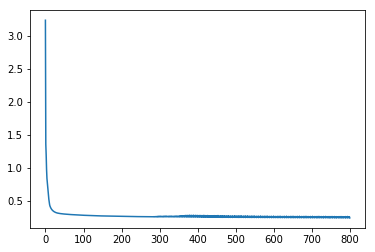

In [20]:
plt.plot(x.losses)

In [21]:
def cutIt(array):
    x=[]
    y=[]
    for i in array:
        x.append(i[0])
        y.append(i[1])
    return x,y

In [22]:
predictions=x.predict(trainData)

In [23]:
xx, yy=cutIt(predictions)
xxx,yyy=cutIt(trainLabels)

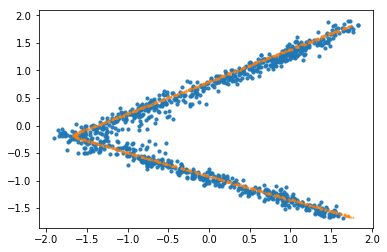

In [24]:
plt.scatter(xx,yy, alpha=0.9, s=10)
plt.scatter(xxx,yyy, alpha= 0.5, s = 2, marker='^')

<a id='mlcupcv'></a>
### C. Training with best parameters obtained, with validation ([to top](#top))

In [31]:
x=perceptron(**defaultParameters)
x.set_params(**bestParams)
x.fit(trainDataCup, trainLabelsCup, validationDataCup, validationLabelsCup, realTimePlotting=False)

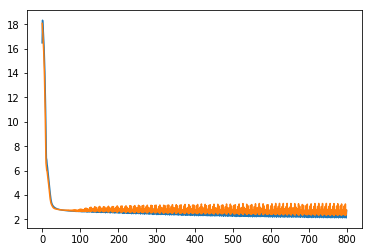

In [32]:
plt.plot(x.losses)
plt.plot(x.validationLosses)

<a id='blindtest'></a>
### D. Blind Test ([to top](#top))

<h3> predicting on model trained with cross validation

In [33]:
blindPredictions=x.predict(blindFeatures)

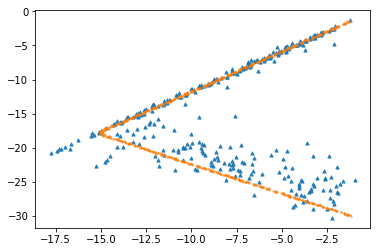

In [34]:
xx, yy=cutIt(blindPredictions)
xxx,yyy=cutIt(trainLabelsCup)
plt.scatter(xx,yy,alpha= 0.9, s = 10, marker='^')
plt.scatter(xxx,yyy, alpha= 0.5, s = 2)

In [35]:
regressionModel=perceptron(**defaultParameters)
regressionModel.set_params(**bestParams)
regressionModel.fit(trainDataCup, trainLabelsCup, realTimePlotting=False)
blindPredictions=regressionModel.predict(blindFeatures)

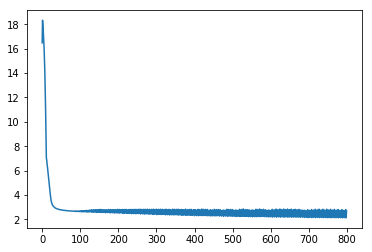

In [36]:
plt.plot(regressionModel.losses)

In [37]:
blindPredictions=regressionModel.predict(blindFeatures)

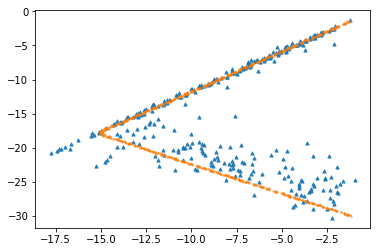

In [38]:
xx, yy=cutIt(blindPredictions)
xxx,yyy=cutIt(trainLabelsCup)
plt.scatter(xx,yy,alpha= 0.9, s = 10, marker='^')
plt.scatter(xxx,yyy, alpha= 0.5, s = 2)